3.- Entrena un modelo en Keras con capas convolucionales para predecir el valor diario de cierre de bolsa de Amazon (puedes usar los datos que vimos en clase y que están en kaggle). Utiliza de los datos de apertura de 4 días anteriores para predecir el valor del día actual. Compáralo con un modelo con una capa lineal.

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np

In [53]:
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv1D, Flatten, GRU

In [3]:
amazon = yf.Ticker("AMZN")
amzn_df = amazon.history(period="max")

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

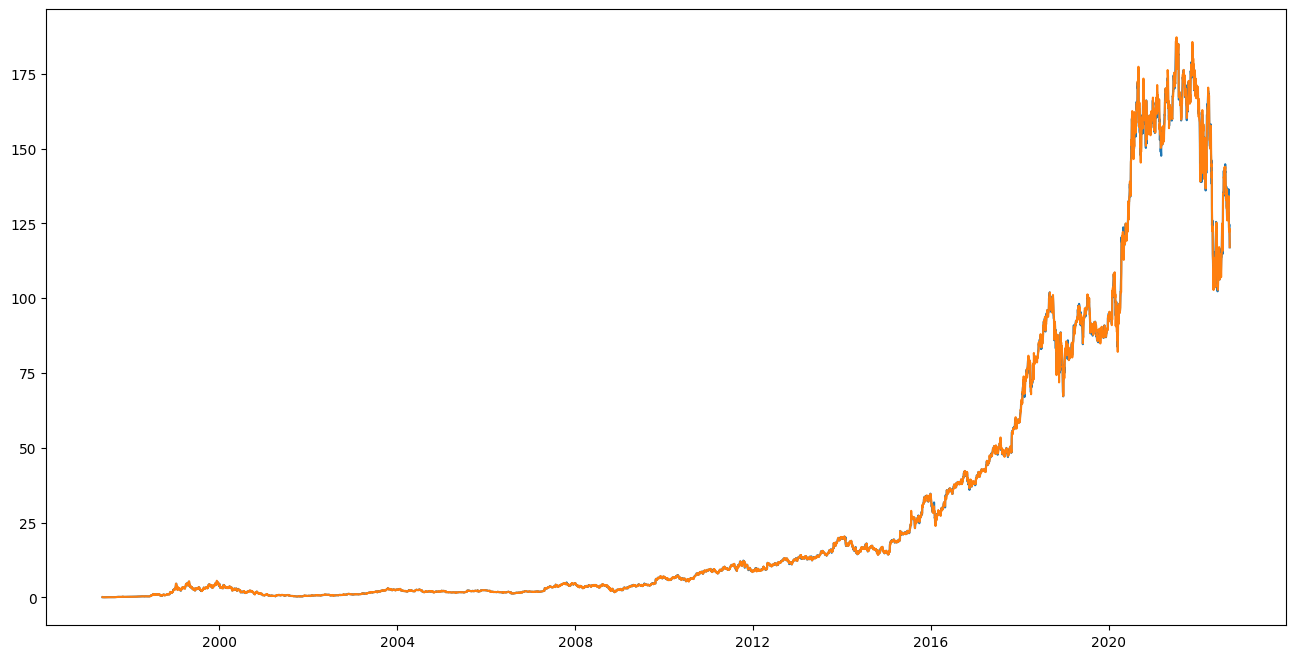

In [86]:
plt.figure(figsize=(16,8))
plt.plot(amzn_df.Close, label="close")
plt.plot(amzn_df.Open, label="open")
plt.label()

In [50]:
batch_size = 4
n_valores = amzn_df.shape[0] -(amzn_df.shape[0]%batch_size)
X_train = amzn_df.iloc[:n_valores, :].Open.values.reshape(-1, batch_size, 1)
Y_train = amzn_df.iloc[:n_valores, :].Close.values[np.arange(3,n_valores,batch_size)]

In [78]:
amzn_df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0,0.0
1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0,0.0
1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0,0.0
1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0,0.0
1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0,0.0


In [82]:
Y_train[:2]

array([0.081771, 0.079167])

In [81]:
X_train[:5]

array([[[0.121875],
        [0.098438],
        [0.088021],
        [0.086458]],

       [[0.081771],
        [0.071875],
        [0.070313],
        [0.075521]],

       [[0.08125 ],
        [0.077083],
        [0.075   ],
        [0.075521]],

       [[0.076563],
        [0.073958],
        [0.070833],
        [0.075781]],

       [[0.082813],
        [0.085417],
        [0.079688],
        [0.079167]]])

In [ ]:
model_amzn = Sequential()

model_amzn.add(Conv1D(12, 2, input_shape=(4,1), activation="relu", padding="same"))
model_amzn.add(Conv1D(24, 2, activation="relu", padding="same"))

model_amzn.add(GRU(12, activation="relu"))

model_amzn.add(Dense(1))

model_amzn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 4, 12)             36        
                                                                 
 conv1d_9 (Conv1D)           (None, 4, 24)             600       
                                                                 
 gru_4 (GRU)                 (None, 12)                1368      
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_amzn = Sequential()

model_amzn.add(Conv1D(12, 2, input_shape=(4,1), activation="relu", padding="same"))
model_amzn.add(Conv1D(24, 2, activation="relu", padding="same"))

model_amzn.add(GRU(12, activation="relu"))

model_amzn.add(Dense(1))

model_amzn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 4, 12)             36        
                                                                 
 conv1d_9 (Conv1D)           (None, 4, 24)             600       
                                                                 
 gru_4 (GRU)                 (None, 12)                1368      
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________


In [77]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [72]:
model_amzn = Sequential()

model_amzn.add(GRU(12, activation="relu", input_shape=(4,1), return_sequences=True))

model_amzn.add(Conv1D(12, 2,  activation="relu", padding="same"))
model_amzn.add(Conv1D(24, 2, activation="relu", padding="same"))

model_amzn.add(Dense(1))

model_amzn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 4, 12)             540       
                                                                 
 conv1d_10 (Conv1D)          (None, 4, 12)             300       
                                                                 
 conv1d_11 (Conv1D)          (None, 4, 24)             600       
                                                                 
 dense_4 (Dense)             (None, 4, 1)              25        
                                                                 
Total params: 1,465
Trainable params: 1,465
Non-trainable params: 0
_________________________________________________________________


In [73]:
opt_adam = Adam(learning_rate = 5e-4)
model_amzn.compile(optimizer=opt_adam,
                   loss='mse',
                   metrics=['mse', 'accuracy'])

In [74]:
history = model_amzn.fit(X_train,
                           Y_train,
                           validation_split = 0.2,
                           epochs=50,
                           batch_size=128)

Epoch 1/50
10/10 [==============================] - 3s 64ms/step - loss: 211.9790 - mse: 211.9790 - accuracy: 0.0000e+00 - val_loss: 16550.2656 - val_mse: 16550.2656 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 17ms/step - loss: 207.1729 - mse: 207.1729 - accuracy: 0.0000e+00 - val_loss: 15852.4326 - val_mse: 15852.4326 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 21ms/step - loss: 203.1255 - mse: 203.1255 - accuracy: 0.0000e+00 - val_loss: 15199.2227 - val_mse: 15199.2227 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 18ms/step - loss: 199.5165 - mse: 199.5165 - accuracy: 0.0000e+00 - val_loss: 14563.5771 - val_mse: 14563.5771 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 195.8917 - mse: 195.8917 - accuracy: 0.0000e+00 - val_loss: 13952.3291 - val_mse: 13952.3291 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [=================

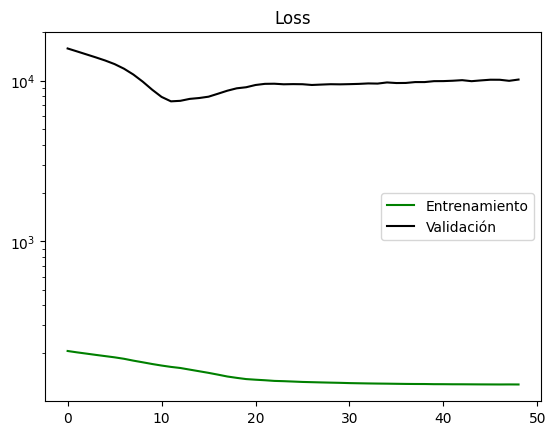

In [75]:
plt.title("Loss")
plt.plot(history.history['loss'][1:],
         color='green',
         label="Entrenamiento")
plt.plot(history.history['val_loss'][1:],
         color='black',
         label="Validación")
plt.legend()
plt.yscale("log")

KeyError: 'mae'

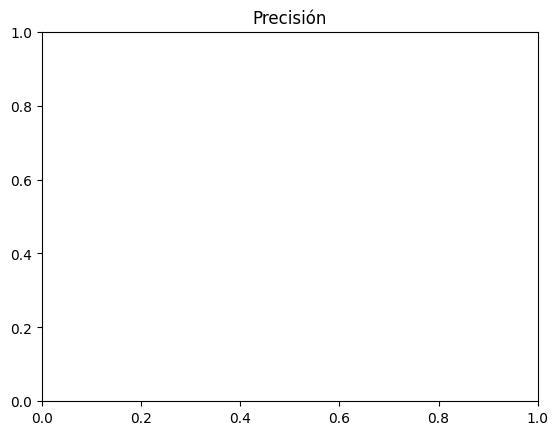

In [70]:
plt.title("Precisión")
plt.plot(history.history['mae'],
         color='green',
         label="Validación")
plt.plot(history.history['accuracy'],
         color='black',
         label="Entrenamiento")
plt.legend()